In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to read and load data
def read_and_load_csv(filepath):
    """Load, read and fix the index column.

    Parameters
    ----------
    filepath : str
        The location of csv file to be read.
    
    Returns
    -------
    pd.DataFrame
        Columns are 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume',
        'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'               
    """
    df = pd.read_csv(filepath, parse_dates=True, index_col='Open time')
    df.index = pd.to_datetime(df.index).tz_localize(None).normalize()

    return df


In [3]:
df = read_and_load_csv("./Datasets/btc_15m_data_2018_to_2025.csv")
df.head()


,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2018-01-01,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999000 UTC,1.675545e+06,1572,63.227133,8.576108e+05,0
2018-01-01,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999000 UTC,1.321757e+06,1461,47.686389,6.422812e+05,0
2018-01-01,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999000 UTC,1.078825e+06,1000,43.710406,5.900347e+05,0
2018-01-01,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999000 UTC,1.917783e+06,1195,73.897993,1.000614e+06,0
2018-01-01,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999000 UTC,9.778198e+05,898,34.257652,4.618369e+05,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262507 entries, 2018-01-01 to NaT
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open                          262507 non-null  float64
 1   High                          262507 non-null  float64
 2   Low                           262507 non-null  float64
 3   Close                         262507 non-null  float64
 4   Volume                        262507 non-null  float64
 5   Close time                    262504 non-null  object 
 6   Quote asset volume            262507 non-null  float64
 7   Number of trades              262507 non-null  int64  
 8   Taker buy base asset volume   262507 non-null  float64
 9   Taker buy quote asset volume  262507 non-null  float64
 10  Ignore                        262507 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 24.0+ MB


# Exploring the data

<Axes: xlabel='Open time'>

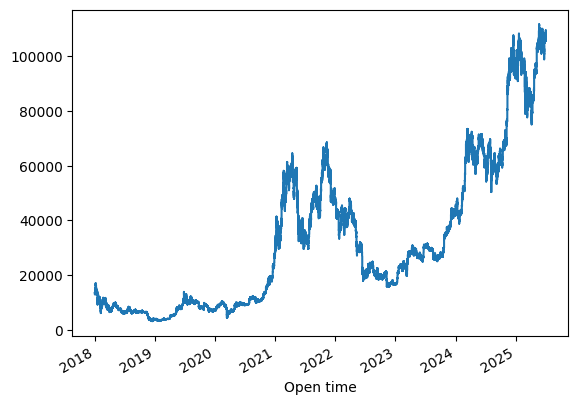

In [5]:
df['7_day_rolling'] = df['Close'].rolling(window=7).mean()
df['7_day_rolling'].plot()

In [6]:
# Highest Average Month
df['Close'].resample('ME').mean().idxmax()

Timestamp('2025-07-31 00:00:00')

In [7]:
df['daily_returns'] = df['Close'].pct_change() * 100
df['daily_returns'].head()

Open time
2018-01-01         NaN
2018-01-01   -0.258407
2018-01-01   -0.375043
2018-01-01    0.435028
2018-01-01   -0.616305
Name: daily_returns, dtype: float64

# Data Manipulation

In [9]:
df.isnull().sum()

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      3
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
7_day_rolling                   6
daily_returns                   1
dtype: int64

In [ ]:
# Fill in missing values
df['7_day_rolling'].bfill(inplace=True)
df['7_day_rolling'].fillna(method='bfill', inplace=True)

# Interpolate missing 7 day rolling
df['7_day_rolling'].interpolate(inplace=True)

df.isnull().sum()


/tmp/ipykernel_6200/824299979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['7_day_rolling'].fillna(method='bfill', inplace=True)
/tmp/ipykernel_6200/824299979.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7_day_rolling'].fillna(method='bfill', inplace=True)


Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      3
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
7_day_rolling                   0
daily_returns                   1
Year                            3
month                           3
day                             3
Weekday_Numeric                 3
Weekend                         0
Weekday                         3
closed_lag_one                  1
dtype: int64

In [14]:
# Extract time variables
df['Year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['Weekday'] = df.index.day_name()
df['Weekday_Numeric'] = df.index.weekday
df['Weekend'] = df.index.weekday > 4
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,7_day_rolling,daily_returns,Year,month,day,Weekday_Numeric,Weekend,Weekday
Open time,,,,,,,,,,,,,,,,,,,
2018-01-01,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999000 UTC,1.675545e+06,1572,63.227133,8.576108e+05,0,13503.19,NaN,2018.0,1.0,1.0,0.0,False,Monday
2018-01-01,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999000 UTC,1.321757e+06,1461,47.686389,6.422812e+05,0,13503.19,-0.258407,2018.0,1.0,1.0,0.0,False,Monday
2018-01-01,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999000 UTC,1.078825e+06,1000,43.710406,5.900347e+05,0,13503.19,-0.375043,2018.0,1.0,1.0,0.0,False,Monday
2018-01-01,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999000 UTC,1.917783e+06,1195,73.897993,1.000614e+06,0,13503.19,0.435028,2018.0,1.0,1.0,0.0,False,Monday
2018-01-01,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999000 UTC,9.778198e+05,898,34.257652,4.618369e+05,0,13503.19,-0.616305,2018.0,1.0,1.0,0.0,False,Monday


In [15]:
# Future Engineering - Lagged Values
df['closed_lag_one'] = df['Close'].shift(1)

# Seasonal Decomposition
Identify trend, seasonality and error term.
Trend - general dirrection of the time series
Seasonality - seasonal cycles
Additive Seasonality - Heavily seasonality fluctuations.
Multiplicative Seasonality - Proportional to the trend.
Error - What is not explained by the trend and seasonality.
Data Visualization and Model Performance

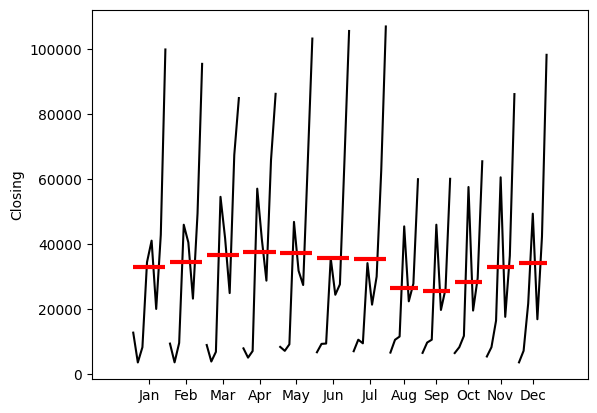

In [25]:
# Python seasonal Plots
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
month_plot(
    df["Close"].resample('ME').mean(), 
    ylabel='Closing'
)
plt.show()

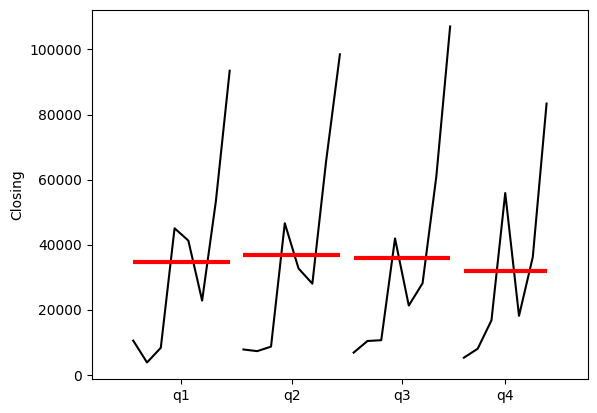

In [24]:
quarter_plot(
    df["Close"].resample('QE').mean(), 
    ylabel='Closing'
)
plt.show()

In [ ]:
# check for NAN values
if df['Close'].isna().any() or np.isinf(df['Close']).any():
    print("Warning: NaN or Inf values still exist!")
else:
    print('No NAN values')

No NAN values


ValueError: Axis limits cannot be NaN or Inf

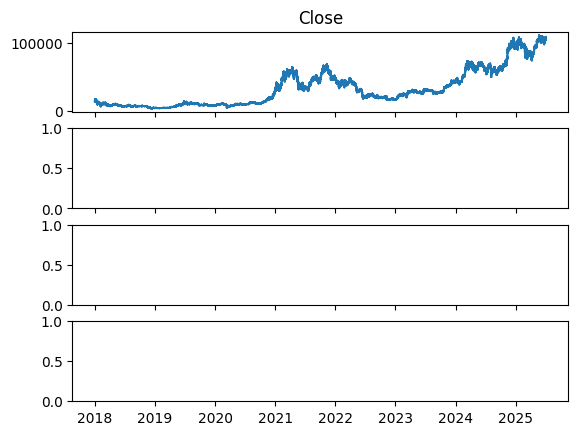

In [ ]:
# Seasonal decompose
dec = seasonal_decompose(df['Close'], model='multiplicative', period=7)
fig = dec.plot()
plt.show()